In [4]:
#importing all the required libraries
import pandas as pd
import numpy as np
import arff
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(text):
    data = False
    header = ""
    new_content = []
    for line in text:
        if not data:
            if "@ATTRIBUTE" in line or "@attribute" in line:
                attributes = line.split()
                if("@attribute" in line):
                    attri_case = "@attribute"
                else:
                    attri_case = "@ATTRIBUTE"
                column_name = attributes[attributes.index(attri_case) + 1]
                header = header + column_name + ","
            elif "@DATA" in line or "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                new_content.append(header)
        else:
            new_content.append(line)
    return new_content


# Main loop for reading and writing files
for file in files:
    with open(file, "r") as inFile:
        content = inFile.readlines()
        name, ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name + ".csv", "w") as outFile:
            outFile.writelines(new)

In [6]:
data = pd.read_csv('phpkIxskf.csv')

In [7]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      45211 non-null  int64 
 1   V2      45211 non-null  object
 2   V3      45211 non-null  object
 3   V4      45211 non-null  object
 4   V5      45211 non-null  object
 5   V6      45211 non-null  int64 
 6   V7      45211 non-null  object
 7   V8      45211 non-null  object
 8   V9      45211 non-null  object
 9   V10     45211 non-null  int64 
 10  V11     45211 non-null  object
 11  V12     45211 non-null  int64 
 12  V13     45211 non-null  int64 
 13  V14     45211 non-null  int64 
 14  V15     45211 non-null  int64 
 15  V16     45211 non-null  object
 16  Class   45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [8]:
# Rename the columns
df = data.rename(columns={'V1': 'age', 'V2': 'job','V3':'marital','V4':'education','V5':'default','V6':'balance','V7':'housing','V8':'loan','V9':'contact','V10':'day','V11':'month','V12':'duration','V13':'campaign','V14':'pdays','V15':'previous','V16':'poutcome','Class':'y'})

In [9]:

df.head()
df.mean()

C:\Users\adkum\AppData\Local\Temp\ipykernel_7008\2978815308.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
y              1.116985
dtype: float64

In [10]:
job_status = df["job"]
print(job_status.value_counts())


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [11]:
marriage_status = df["marital"]
print(marriage_status.value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [12]:
education_status = df["education"]
print(education_status.value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [13]:
loan_status = df["loan"]
print(loan_status.value_counts())

no     37967
yes     7244
Name: loan, dtype: int64


In [14]:
housing_status = df["housing"]
print(housing_status.value_counts())

yes    25130
no     20081
Name: housing, dtype: int64


In [15]:
contact = df["contact"]
print(contact.value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [18]:
poutcome_status = df["poutcome"]
print(poutcome_status.value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


<AxesSubplot:>

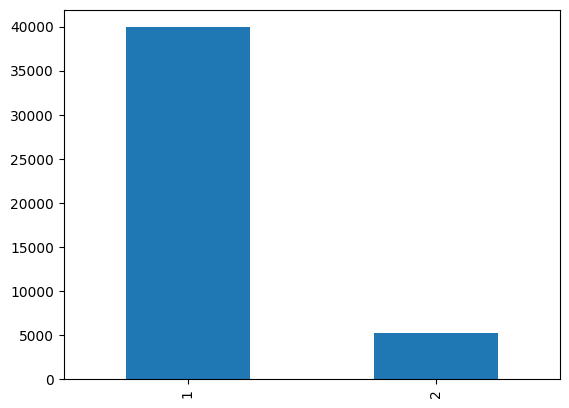

In [19]:
y_status = df["y"]
y_status.value_counts().plot(kind="bar")

In [20]:
month_stats = df['month']
print(month_stats.value_counts())

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


In [16]:
df.describe()
df['y']=df['y'].replace({1.0:'no',2.0:'yes'})

In [17]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [18]:
duration_stats = df['duration']
print(max(duration_stats),min(duration_stats))

4918 0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


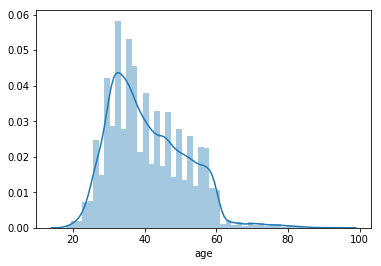

In [19]:
sns.distplot(df.age);

In [20]:
print(df.corr())

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


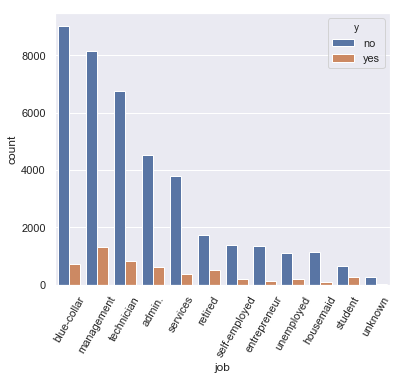

In [21]:

sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = df, hue = "y", order = df["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)

plt.show()

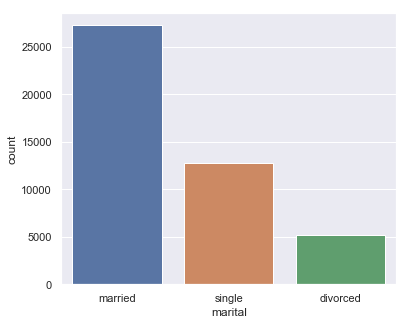

In [22]:
sns.countplot(df["marital"])

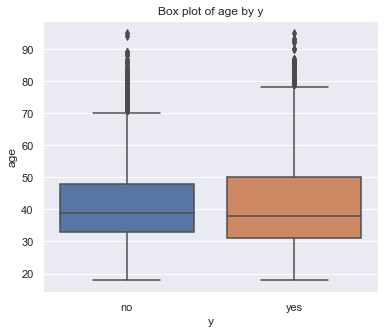

In [23]:
sns.boxplot(x='y', y='age', data=df)
plt.title('Box plot of age by y')
plt.show()

In [24]:
age_y_grouped = df.groupby(['age', 'y'])
age_y_summary = age_y_grouped.describe()
print(age_y_summary)

        balance                                                       \
          count          mean           std     min      25%     50%   
age y                                                                  
18  no      5.0    515.600000    816.601065     5.0    35.00   156.0   
    yes     7.0    270.142857    253.177427     3.0   108.00   108.0   
19  no     24.0    638.583333   1143.599349     0.0    59.00   212.0   
    yes    11.0    324.181818    217.639986   103.0   121.00   329.0   
20  no     35.0    719.914286   1657.073721  -322.0    73.00   179.0   
    yes    15.0   1126.666667   1776.203120    76.0   215.00   502.0   
21  no     57.0    749.157895   1168.741017  -426.0   130.00   325.0   
    yes    22.0   1171.454545   1834.856313  -172.0   146.00   423.0   
22  no     89.0    990.415730   1729.914264  -295.0   104.00   356.0   
    yes    40.0    813.650000   1011.255821   -51.0   129.00   402.0   
23  no    158.0   1115.462025   2315.893438  -782.0    86.50   3

In [26]:
# y_grouped = df.groupby('y')
# age_means = y_grouped['age'].mean()
# print(age_means[1])


# y_grouped = df.groupby('y')
# age_means = y_grouped['age'].mean()
# print(age_means[2])


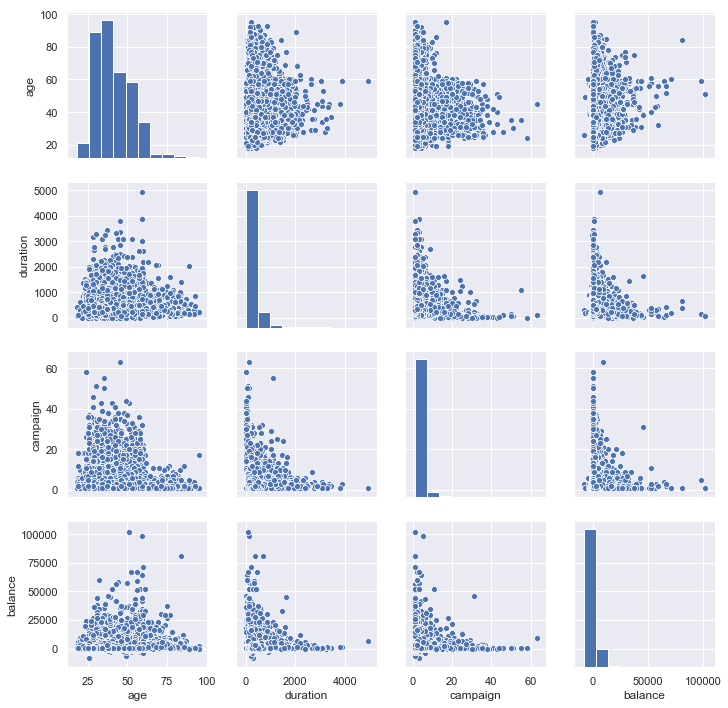

In [27]:
sns.pairplot(df[["age", "duration", "campaign","balance"]]);


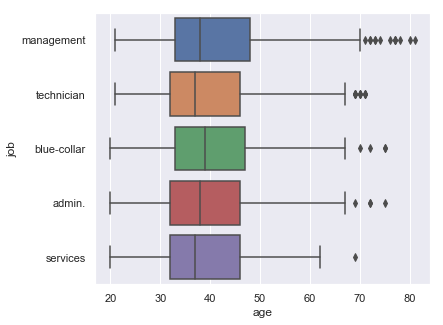

In [28]:
top_jobs = (df.job.value_counts().sort_values(ascending=False).head(5).index.values)
sns.boxplot(y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h")

Text(0,0.5,'Proportion of Customers')

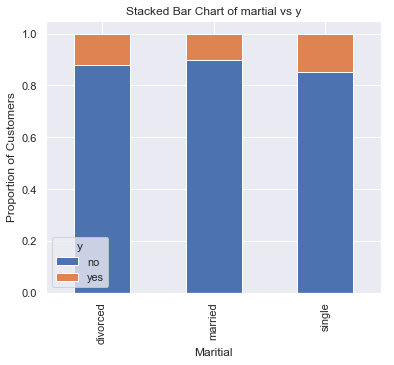

In [29]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of martial vs y')
plt.xlabel('Maritial')
plt.ylabel('Proportion of Customers')

Text(0,0.5,'Proportion of Customers')

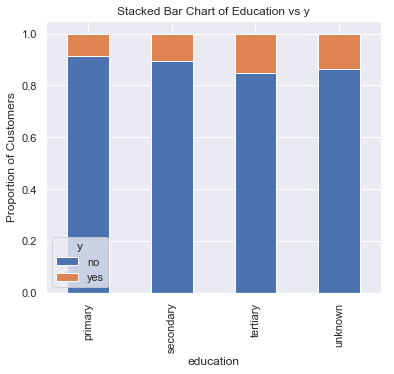

In [30]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs y')
plt.xlabel('education')
plt.ylabel('Proportion of Customers')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


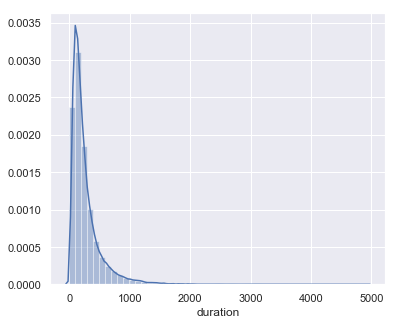

In [31]:
sns.distplot(df.duration);

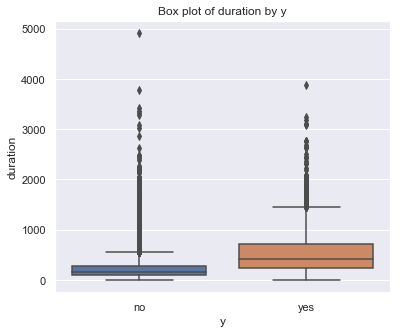

In [32]:
sns.boxplot(x='y', y='duration', data=df)
plt.title('Box plot of duration by y')
plt.show()


In [33]:
mean_duration_y1 = df.loc[df['y'] == 1, 'duration'].mean()
print("Mean duration for y=1:",mean_duration_y1)
mean_duration_y1 = df.loc[df['y'] == 2, 'duration'].mean()
print("Mean duration for y=2:",mean_duration_y1)

Mean duration for y=1: nan
Mean duration for y=2: nan


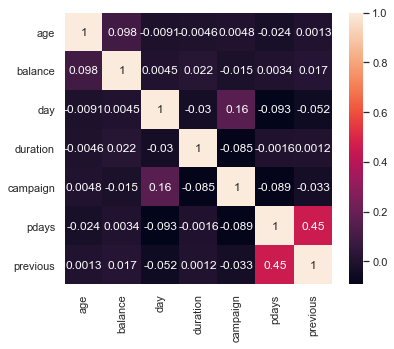

In [34]:
sns.heatmap(df.corr(),annot=True)

In [36]:
# job_marital_y = (df.pivot_table(index="job", columns="marital", values="y", aggfunc=sum))
# sns.heatmap(job_marital_y, annot=True, fmt="d", linewidths=0.5)

Data Cleaning and Feature Engineering

In [37]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


Replacing yes and no with 1's and 0's

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
    
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print('Training data shape:', X_train.shape, y_train.shape)
print('Test data shape:', X_test.shape, y_test.shape)
